In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [2]:
b= 0.023
zR = b / 2     # [m] Rayleigh Range
omega0 = np.sqrt(lambda_355 * zR / np.pi) # [m] Beam radius at the focus
PXe = 25

pulse_params = {'b' : b,            # [m] confocal parameter
            'zR' : zR,           # [m] Rayleigh range
            'omega0' : omega0,   # [m] beam waist at focus
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9}     # [s] single pulse length

harm_params = {'sigma' : 1.5e-50,
            'chi3' : 1.5e-35,
            'PXe' : PXe}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 20*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params = {'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}


params = {**pulse_params, **harm_params, **sol_params}
initial_vals = (nonzero, nonzero)




sol = solve_diff_eq_1D(dA118_dz_GBNA_curly,params,zrange, initial_vals,z,r)


    

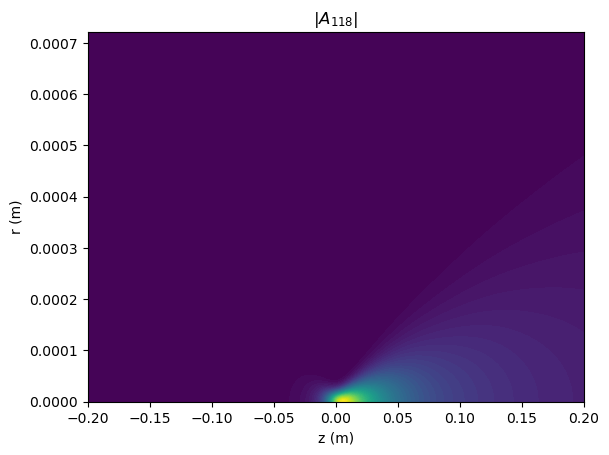

In [3]:

Z,R = np.meshgrid(z,r)
plt.contourf(Z,R,sol.beam_118.data,64)

plt.ylim(0,20*omega0)
plt.xlim(zstart,zstop)
plt.xlabel('z (m)')
plt.ylabel('r (m)')
plt.title("$|A_{118}|$")
plt.show()

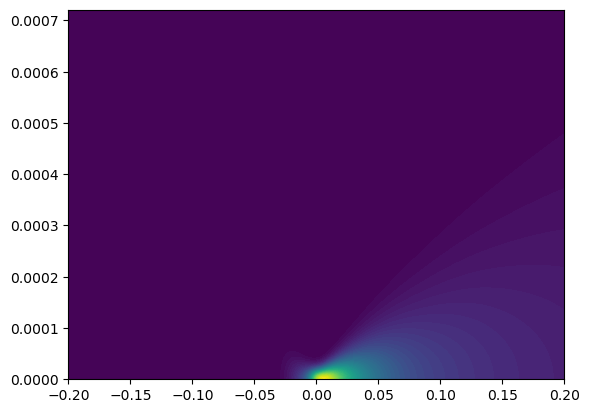

In [4]:
mag2 = np.array(np.zeros(len(z))) # values of the magnitude of J_3 for plotting, similar to phi3
r = np.linspace(0,20*omega0,1000)
Z,R = np.meshgrid(z,r)
index=0
for num in z:
    mag2[index] = np.sqrt(ReJ3(num,zstart,2/b,params)**2+ImJ3(num,zstart,2/b,params)**2)
    index+=1

boyd118 = (1/2) * k118 * params['chi3'] * Torr_to_m3 *params['PXe'] * peak_amplitude_355(params) **3 \
* mag2 \
* omega0/beam_radius(Z,params)*np.exp(-3*R**2/beam_radius(Z,params)**2)

plt.contourf(Z,R,boyd118,64)